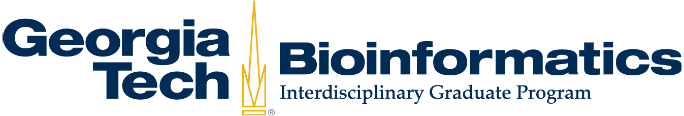

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 6 (Variant consequences) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 5th, 2024</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

## 1. Quantifying by populations
### *Total Questions: 2*
### *Total Points: 25+40 (10+30) = 65*



In [12]:
!pwd

/home/hice1/vpasumarthy3/My_notebooks/Projects/Proj6


In [ ]:
#ls -lh the 1000 genomes source files
!ls -lh ~/biol6150/Data/1000Genomes/

<div class="alert alert-block alert-warning">
    <h3>1.1 Sickle cell carriers by population</h3>
    <p><b>Background: </b>Different genes perform different functions in our body. rs334 is a missense variant on HBB gene, involved in haemoglobin pathway. It is associated with sickle cell anaemia and malaria resistance, and represents the phenotype-associated A allele.</p>
    <p><b>Objective: </b>The 1000 genomes VCF files have multiple samples in them. Every sample has a designated population label such as GWD, MSL, PUR, LWK, CEU, ACB, and so on. Find out the number of people in every population who carry the sickle cell variant. The final output will simply show number of samples per poulation (you can write it in markdown text).</p>
    <p><b>Instructions: </b>We expect you to show all your work (VCF file processing; extraction etc). You can use Python programming for any data processing. </p>
        <p>There is no specific formatting requirement for the final answer. But it should be readable and comprehensible to the notebook reader.</p>
</div>

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [7]:
#subset to rs334 region of ch11
!bcftools view -r chr11:5225464-5227071 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.vcf ~/biol6150/Data/1000Genomes/phase3.chr11.GRCh38.GT.crossmap.vcf.gz
!bcftools view -i 'ID="rs334"' -v snps -Oz -o rs334.vcf.gz ~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.vcf

#grab just id and genotype
!bcftools query -f '[\t%SAMPLE=%GT]\n' ~/My_notebooks/Projects/Proj6/rs334.vcf.gz > ~/My_notebooks/Projects/Proj6/rs334.txt

#read in genotypes
with open('./rs334.txt', 'r') as file:
    elements = file.read().split()

ids = []
genotypes = []
for i in range(len(elements)):
    ele = elements[i]
    ids.append(ele.split('=')[0])
    genotypes.append(ele.split('=')[1])
genotype_df = pd.DataFrame([ids, genotypes]).T
genotype_df.columns = ['id', 'geno']
    
#read in reference file for 1000 genomes
igsr_df = pd.read_csv('~/My_notebooks/Projects/Proj6/igsr_samples.tsv', sep = '\t')

#join df to get population
genotype_df = pd.merge(genotype_df, igsr_df[['Sample name', 'Population code']], how = 'left', left_on = 'id', right_on = 'Sample name')

def id_carrier(genotype):
    try:
        g = genotype.split('|')
        if '1' in genotype:
            return 1
        else:
            return 0
    except: #some have no genotype?
        return 0
    
#label carriers
genotype_df['carrier counts'] = genotype_df['geno'].apply(lambda x: id_carrier(x))
#counts by population
genotype_df[['Population code', 'carrier counts']].groupby(['Population code']).sum()

,carrier counts
Population code,
ACB,9
ASW,2
BEB,0
CDX,0
CEU,0
CHB,0
CHS,0
CLM,2
ESN,24


<div class="alert alert-block alert-warning">
    <h3>1.2 CFTR and cystic fibrosis</h3>
    <p><b>Background: </b>The cystic fibrosis transmembrane conductance regulator (CFTR) protein helps to maintain the balance of salt and water on many surfaces in the body, such as the surface of the lung. The CFTR protein is a particular type of protein called an ion channel.</p><br>
    <p><b>Objective 1.2.1: </b>How many Pathogenic variants are present in the 1000 Genomes data?</p>
    <p><b>Objective 1.2.2: </b>Give a population breakdown of individuals who have at least 1 Pathogenic CFTR variants as defined in the Gnomad browser? Your final answer can look like: CEU: 5, TSI: 2, ...</p><br>
    <p><b>Instructions: </b>"Pathogenic" can be defined in a variety of ways. For simplicity, we will use the Gnomad browser in this case. You can search any gene in the browser, and a detailed table is provided at the end of the search page (check the screenshot below). Clinical significance based on ClinVar annotations are provided in this table.</p>
    <p>Please show all your work. There is no specific formatting requirement for the final answer. But it should be readable and comprehensible to the notebook reader.</p>
</div>

In [8]:
!bcftools view -r chr7:117480025-117668665 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr7.CFTR.vcf ~/biol6150/Data/1000Genomes/phase3.chr7.GRCh38.GT.crossmap.vcf.gz

In [9]:
#load gnomad data
gnomad_df = pd.read_csv('~/My_notebooks/Projects/Proj6/gnomad_cftr.csv')
gnomad_df = gnomad_df.fillna(' ')
gnomad_df.groupby(['ClinVar Clinical Significance']).count()
gnomad_df['pathogenic_flag'] = np.where(gnomad_df['ClinVar Clinical Significance'].isin(['Pathogenic', 'Pathogenic/Likely pathogenic', 'Pathogenic; drug response']), 1, 0)
pathogenic_df = gnomad_df[gnomad_df['pathogenic_flag'] == 1]
pathogenic_df[pathogenic_df['rsIDs'] == 'rs1800501']
print('Total number of pathogenic varients in gnomad: ' + str(len(pathogenic_df)))

#query the columns and IDs
!bcftools query -f '%POS\t%ID\t%REF\t%ALT[\t%SAMPLE\t%GT]\n' ~/My_notebooks/Projects/Proj6/1000Genomes.Chr7.CFTR.vcf  > ~/My_notebooks/Projects/Proj6/cftr.tsv
cftr_df = pd.read_csv('~/My_notebooks/Projects/Proj6/cftr.tsv', sep = '\t', header = None)
#clean up dataframe for melting/pivoting
first_names = ['pos', 'var_id', 'ref', 'alt']
numbers = [str(i) for i in range(cftr_df.shape[1] - len(first_names))]
col_names = first_names + numbers
cftr_df.columns = col_names
#dealtrenate the ID/Genotype columns
genotype_lists = []
for i in range(len(cftr_df)):
    row = cftr_df.iloc[i, :]
    row_ids = row[4::2]  
    genotypes = row[5::2]
    genotype_lists.append(list(genotypes))
genotype_df = pd.DataFrame(genotype_lists, columns = row_ids)
genotype_df.reset_index(inplace = True, drop = True)
#remove the alternated columns and concat the dataframe back together
cftr_df = cftr_df.iloc[:, :4]
cftr_df.reset_index(inplace = True, drop = True)
cftr_df = pd.concat([cftr_df, genotype_df], axis = 1)
#melt df to prepare for joining to gnomad data
cftr_df = cftr_df.melt(id_vars=['pos', 'var_id', 'ref', 'alt'],
                            var_name='sample_id', value_name='genotype')
#join df to get population
cftr_df = pd.merge(cftr_df, igsr_df[['Sample name', 'Population code']], how = 'left', left_on = 'sample_id', right_on = 'Sample name')
#join to gnomad
cftr_df = pd.merge(cftr_df, gnomad_df, how = 'left', left_on = ['var_id', 'pos'], right_on = ['rsIDs', 'Position'])
cftr_df = cftr_df[['pos', 'var_id', 'ref', 'alt', 'sample_id', 'genotype', 'Sample name', 'Population code', 'gnomAD ID']]
cftr_df['pathogenic'] = np.where(cftr_df['gnomAD ID'].isna(), 0, 1)
#dedupe rows multipled by melting and dedupe down to just what we need for pathogenic varients
basic_pathogen_df = cftr_df[['Population code', 'pathogenic', 'sample_id']]
basic_pathogen_df.drop_duplicates(inplace = True)
#get counts of at least 1 pathogen by population
basic_pathogen_df[['Population code', 'pathogenic']].groupby(['Population code']).sum()

Total number of pathogenic varients in gnomad: 386


,pathogenic
Population code,
ACB,96
ASW,61
BEB,86
CDX,93
CEU,99
CHB,103
CHS,105
CLM,94
ESN,99


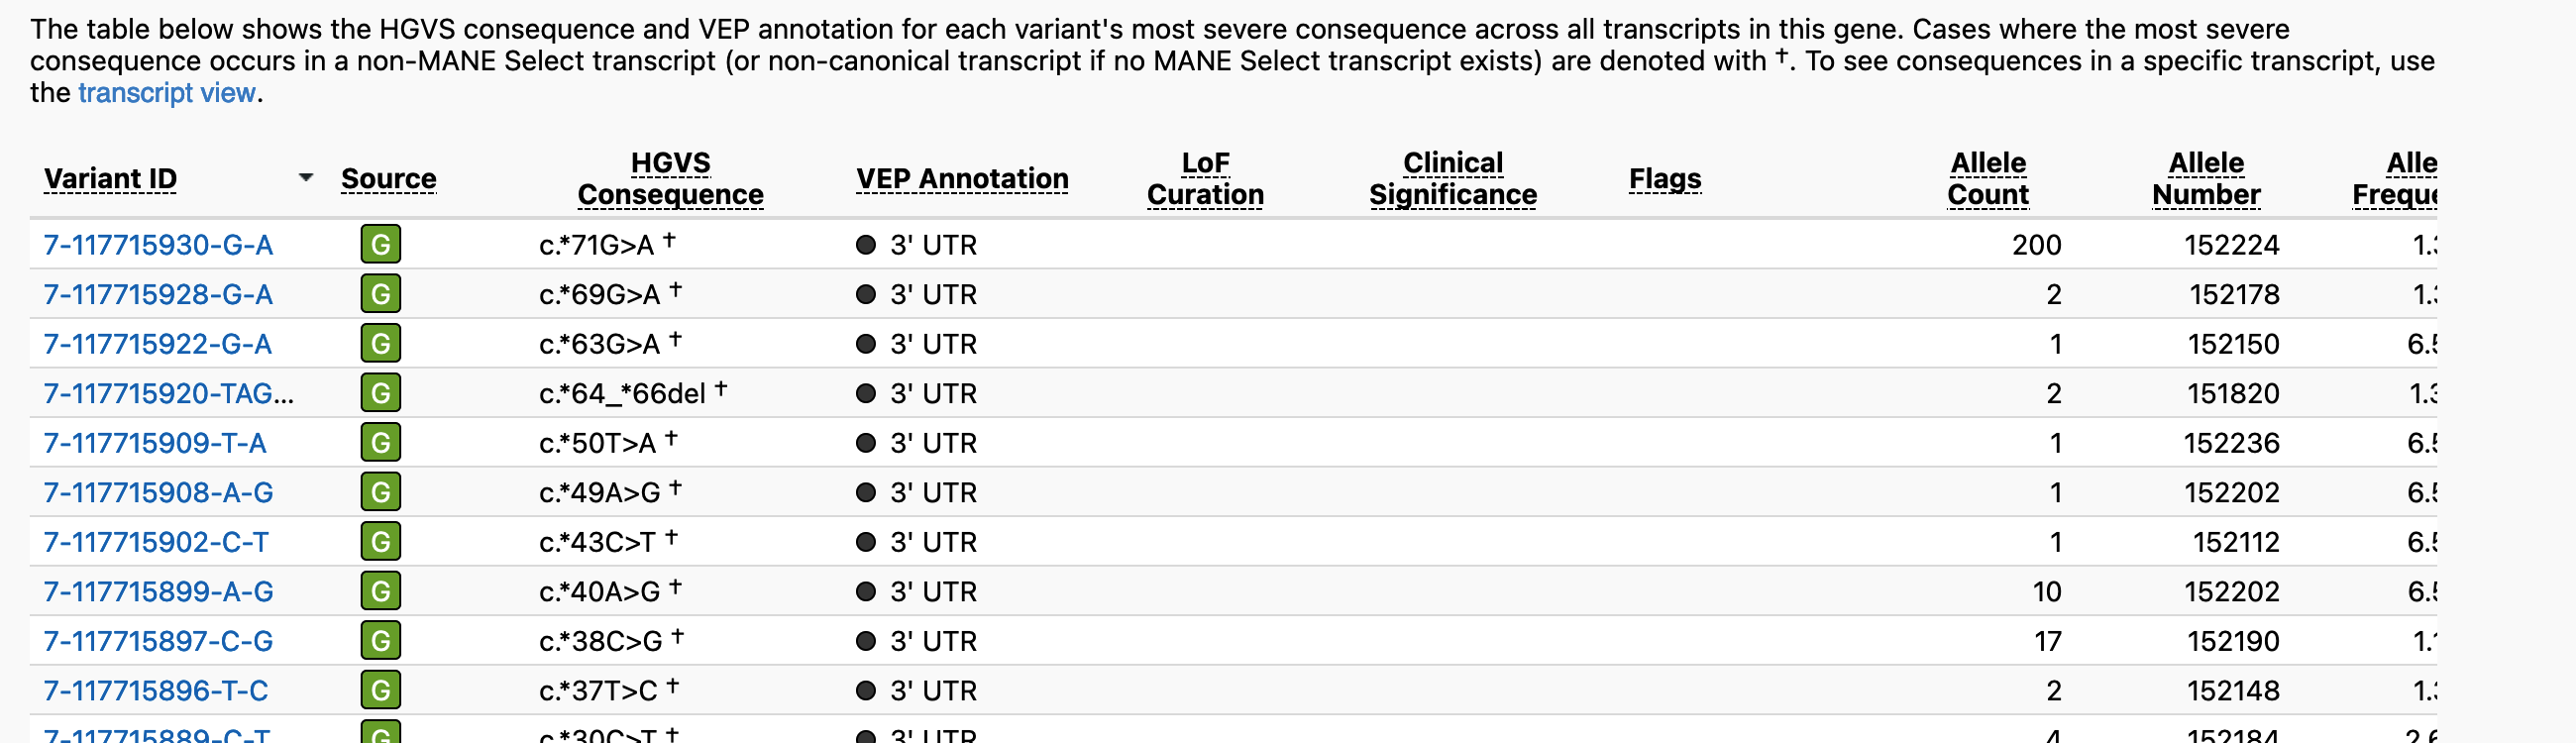

In [ ]:
# Add in cells for 1.2 and complete all the work here.

# **2. Annotating variants**
### *Total Questions: 2*
### *Total Points: 35 = 10 + 10 + 15*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Find clinically important genes</h3>
    <p>Different genes perform different functions in our body. Is there a way we can find clincically important genes for humans? Search on web and find a resource that can tell you which genes are clinically important (there can be multiple answers)</p>
</div>

In [14]:
#What was the resource that you identified? Give a 1-3 line description and the web link.

#### ClinVar
ClinVar is a public database hosted by NCBI which provides information about the clinical significance of genetic variants and their relationships to human health. It aggregates data from clinical laboratories and research studies, linking variants to associated diseases and phenotypes. Web link to ClinVar: https://www.ncbi.nlm.nih.gov/clinvar/

Few other resources we came across are:

1. ClinGen (Clinical Genome Resource): ClinGen is a comprehensive resource that collects and curates information on clinically relevant genes and variants1. It has features like Gene-Disease Clinical Validity Classification, which is categorizes gene-disease relationships based on the strength of evidence. It also has provides information on Identifies genes that, when altered, confer a high risk of serious but preventable or mitigatable diseases. It includes access to variant-level evidence for variant classification. (https://clinicalgenome.org/)

2. ACMG Gene List: The American College of Medical Genetics and Genomics (ACMG) maintains a list of clinically actionable genes. It is widely used in clinical genomics and focusu on highly penetrant genetic disorders. (https://www.acmg.net/)

<div class="alert alert-block alert-warning">
    <h3>2.2 Varints in those genes</h3>
    <p><b>2.2.1</b> Identify a set of genes (3-8 genes; not a lot) that are clinically relevant for humans? These could be on one chromosome or multiple.</p>
    <p><b>2.2.2</b> Extract variants on the selected genes and annotate them. Depending on what genesyou selected, you might have to work on more than one VCF file.</p>
    <p><b>2.2.3</b> Pick any one of the genes and identify a transcript associated on that gene. Clearly write what transcript you have picked, and why?. How many variants have a HIGH or MODERATE variant effect consequence? (If your gene/transcript has 0 HIGH or MODERATE variants, please select another gene).</p>
</div>

#### 2.2.1 
Some genes we could identify are:
1. HBB - sickle cell anaemia (chr11)
2. CFTR - cystic fibrosis (chr7)
3. BRCA1 - breast cancer (chr17)
4. TP53 - multiple cancers (chr17)

#### 2.2.2 Extracting and annotating the selected genes and variants:

1. HBB

In [1]:
!bcftools view -r chr11:5225464-5227071 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.vcf ~/biol6150/Data/1000Genomes/phase3.chr11.GRCh38.GT.crossmap.vcf.gz

In [6]:
!snpEff ann GRCh38.105 ~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.vcf > ~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.Annotated.vcf

2. CFTR

In [2]:
!bcftools view -r chr7:117480025-117668665 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr7.CFTR.vcf ~/biol6150/Data/1000Genomes/phase3.chr7.GRCh38.GT.crossmap.vcf.gz

In [13]:
!snpEff ann GRCh38.105 ~/My_notebooks/Projects/Proj6/1000Genomes.Chr7.CFTR.vcf > ~/My_notebooks/Projects/Proj6/1000Genomes.Chr7.CFTR.Annotated.vcf

3. BRCA1

In [3]:
!bcftools view -r chr17:43044294-43125482 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.BRCA1.vcf ~/biol6150/Data/1000Genomes/phase3.chr17.GRCh38.GT.crossmap.vcf.gz

In [14]:
!snpEff ann GRCh38.105 ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.BRCA1.vcf > ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.BRCA1.Annotated.vcf

4. TP53

In [4]:
!bcftools view -r chr17:7566837-7590868 -Ov -o ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.TP53.vcf ~/biol6150/Data/1000Genomes/phase3.chr17.GRCh38.GT.crossmap.vcf.gz

In [15]:
!snpEff ann GRCh38.105 ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.TP53.vcf > ~/My_notebooks/Projects/Proj6/1000Genomes.Chr17.TP53.Annotated.vcf

#### 2.2.3 Transcript of Gene HBB
Using Ensembl(https://useast.ensembl.org/index.html), we identifed a transcript ENST00000647020.1 associated with HBB-206. We chose to go with this transcript because it encodes one of the primary forms of the hemoglobin beta subunit, which plays a crucial role in oxygen transport in the blood. Variants within this transcript are directly associated with the functionality of hemoglobin.

In [11]:
import pandas as pd

# Load the annotated VCF file
annotated_vcf = pd.read_csv('~/My_notebooks/Projects/Proj6/1000Genomes.Chr11.HBB.Annotated.vcf', sep='\t', comment='#', header=None)

# Check the number of columns
#print(f"Number of columns in the VCF file: {len(annotated_vcf.columns)}")
#print("Column sample data:\n", annotated_vcf.head())

# Rename only the first 8 columns to focus on basic VCF information and annotations
annotated_vcf.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO'] + list(annotated_vcf.columns[8:])

# Filter the 'INFO' column for the specific transcript and impact levels
# Adjust based on the presence of the transcript ID and impact levels within INFO details
transcript_id = 'ENST00000647020.1'
high_moderate_variants = annotated_vcf[
    annotated_vcf['INFO'].str.contains(transcript_id) &
    annotated_vcf['INFO'].str.contains("HIGH|MODERATE")
]

# Display the filtered results
print(f"Number of HIGH/MODERATE impact variants for {transcript_id}: {len(high_moderate_variants)}")
#print(high_moderate_variants[['CHROM', 'POS', 'ID', 'REF', 'ALT', 'INFO']])


Number of HIGH/MODERATE impact variants for ENST00000647020.1: 17
